[Link to Dataset Assignments](https://docs.google.com/spreadsheets/d/10OKNCGU9dFmqgVDyWDduN_dHG7RPhSqJJt3fMGUaQwI/edit?usp=sharing)

[Data Descriptions](https://colab.research.google.com/drive/14i0RSqKRLowamtV5DjUxqlbf7QmU5eRm)

In [211]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric

## Objective:  Predict NYC House Prices

### Read Data

In [212]:
# read data into a DataFrame
data = pd.read_csv('nyc-rolling-sales.csv', index_col=0)

### Variables

- **BOROUGH**
- **NEIGHBORHOOD**
- **BUILDING CLASS CATEGORY**
- **TAX CLASS AT PRESENT**
- **BLOCK**
- **LOT**
- **EASE-MENT**
- **BUILDING CLASS AT PRESENT**
- **ADDRESS**
- **APARTMENT NUMBER**
- **ZIP CODE**
- **RESIDENTIAL UNITS**
- **COMMERCIAL UNITS**
- **TOTAL UNITS**
- **LAND SQUARE FEET**
- **GROSS SQUARE FEET**
- **YEAR BUILT**
- **TAX CLASS AT TIME OF SALE**
- **BUILDING CLASS AT TIME OF SALE**
- **SALE PRICE**

### Target  

- **SALE DATE**

# Look at the Data

In [213]:
pd.set_option('display.max_columns',999)
data.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [214]:
data.shape

(84548, 21)

In [215]:
data.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [216]:
!pip install pandas_profiling

In [217]:
import pandas_profiling as pp

In [ ]:
report = pp.ProfileReport(data)
report

In [ ]:
report.to_file('data_assessment.html')

In [219]:
data.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [220]:
data['SALE PRICE'].head()

4    6625000
5        -  
6        -  
7    3936272
8    8000000
Name: SALE PRICE, dtype: object

In [221]:
data['SALE PRICE'] =pd.to_numeric(data['SALE PRICE'], errors = 'coerce') ## convert to float

In [222]:
data['SALE PRICE'].isna().sum()

14561

In [223]:
data['SALE PRICE'].head()

4    6625000.0
5          NaN
6          NaN
7    3936272.0
8    8000000.0
Name: SALE PRICE, dtype: float64

In [224]:
data['GROSS SQUARE FEET'].head()

4     6440
5    18690
6     7803
7     6794
8     4615
Name: GROSS SQUARE FEET, dtype: object

In [225]:
data['GROSS SQUARE FEET'] =pd.to_numeric(data['GROSS SQUARE FEET'], errors = 'coerce')
data['GROSS SQUARE FEET'].head()

4     6440.0
5    18690.0
6     7803.0
7     6794.0
8     4615.0
Name: GROSS SQUARE FEET, dtype: float64

In [226]:
data['GROSS SQUARE FEET'].isna().sum()

27612

In [227]:
data['GROSS SQUARE FEET']=data['GROSS SQUARE FEET'].fillna(0)
data['GROSS SQUARE FEET'].isna().sum()

0

In [228]:
data['LAND SQUARE FEET'].head()

4    1633
5    4616
6    2212
7    2272
8    2369
Name: LAND SQUARE FEET, dtype: object

In [229]:
data['LAND SQUARE FEET'] =pd.to_numeric(data['LAND SQUARE FEET'], errors = 'coerce')
data['LAND SQUARE FEET'].head()

4    1633.0
5    4616.0
6    2212.0
7    2272.0
8    2369.0
Name: LAND SQUARE FEET, dtype: float64

In [230]:
data['LAND SQUARE FEET'].isna().sum()

26252

In [231]:
data['LAND SQUARE FEET']=data['LAND SQUARE FEET'].fillna(0)
data['LAND SQUARE FEET'].isna().sum()

0

In [232]:
data['SALE PRICE'].isna().sum()

14561

In [233]:
data['SALE PRICE']=data['SALE PRICE'].fillna(0) 

In [234]:
data['SALE PRICE'].isna().sum()

0

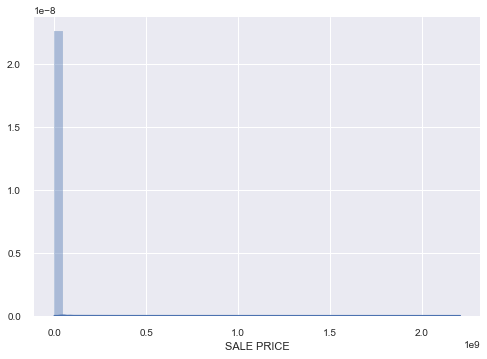

In [235]:
sns.distplot(data['SALE PRICE'])

In [236]:
# Only include rows with sale price > 10

data=data[data['SALE PRICE']>10]

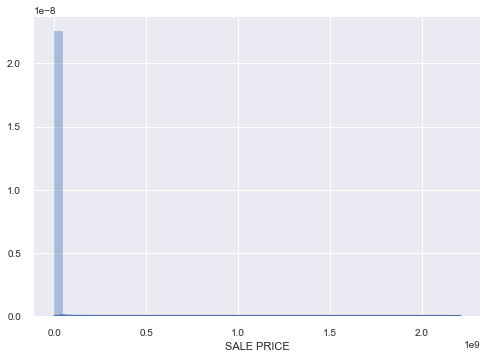

In [237]:
sns.distplot(data['SALE PRICE'])

In [238]:
data.shape

(58852, 21)

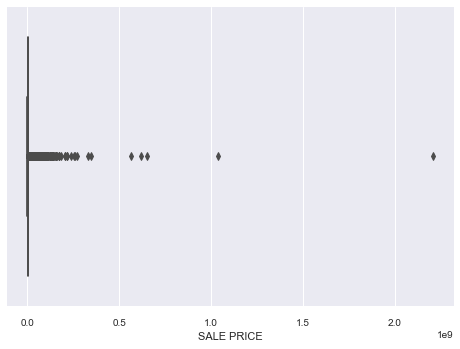

In [239]:
sns.boxplot(x=data["SALE PRICE"])

In [240]:
data['SALE PRICE'].describe(percentiles=[.05,.95]) # extract 5th and 95th percentiles

count    5.885200e+04
mean     1.517966e+06
std      1.242277e+07
min      1.900000e+01
5%       1.450000e+05
50%      6.350000e+05
95%      4.025224e+06
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [241]:
data=data[data['SALE PRICE']>1.450000e+05] # filter out values below 5th percentile


In [242]:
data=data[data['SALE PRICE']<4.025224e+06] # remove values above 95th percentile

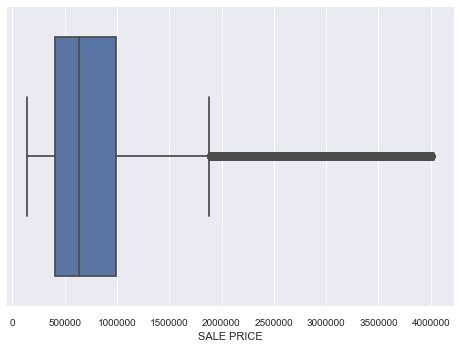

In [243]:
sns.boxplot(x=data["SALE PRICE"])

In [244]:
data.shape

(52956, 21)

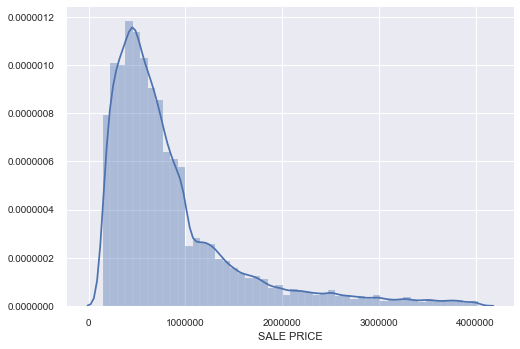

In [245]:
sns.distplot(data['SALE PRICE'])

In [246]:
data['SALE PRICE'].describe()

count    5.295600e+04
mean     8.437725e+05
std      6.834451e+05
min      1.451050e+05
25%      4.056000e+05
50%      6.350000e+05
75%      9.950000e+05
max      4.025000e+06
Name: SALE PRICE, dtype: float64

In [247]:
data['LAND SQUARE FEET'].describe()

count    5.295600e+04
mean     1.881170e+03
std      2.242432e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.225000e+03
75%      2.500000e+03
max      4.228300e+06
Name: LAND SQUARE FEET, dtype: float64

In [248]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [249]:
data=data[data['LAND SQUARE FEET']>0] # Only include rows with land square feet > 10

In [250]:
data['LAND SQUARE FEET'].describe()

count    2.716900e+04
mean     3.666651e+03
std      3.120245e+04
min      3.300000e+01
25%      2.000000e+03
50%      2.500000e+03
75%      3.900000e+03
max      4.228300e+06
Name: LAND SQUARE FEET, dtype: float64

In [251]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,27169.000000,27169.000000,27169.000000,27169.000000,27169.000000,27169.000000,27169.000000,2.716900e+04,2.716900e+04,27169.000000,27169.000000,2.716900e+04
mean,3.616622,5700.698848,62.637859,10945.897862,2.002319,0.190658,2.191763,3.666651e+03,2.576333e+03,1903.565645,1.181898,7.895201e+05
std,0.954284,3743.169628,126.148845,1000.060929,12.842895,13.751323,18.891865,3.120245e+04,2.477328e+04,270.987814,0.627661,5.845342e+05
min,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.300000e+01,0.000000e+00,0.000000,1.000000,1.451050e+05
25%,3.000000,2924.000000,20.000000,10465.000000,1.000000,0.000000,1.000000,2.000000e+03,1.312000e+03,1920.000000,1.000000,4.400000e+05
50%,4.000000,5065.000000,39.000000,11222.000000,1.000000,0.000000,2.000000,2.500000e+03,1.789000e+03,1930.000000,1.000000,6.250000e+05
75%,4.000000,7909.000000,65.000000,11374.000000,2.000000,0.000000,2.000000,3.900000e+03,2.475000e+03,1960.000000,1.000000,9.170000e+05
max,5.000000,16319.000000,7501.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,4.025000e+06


In [252]:
data.shape

(27169, 21)

In [253]:
data['LAND SQUARE FEET'].head()

7      2272.0
10     1750.0
176    1520.0
199    1218.0
226    1566.0
Name: LAND SQUARE FEET, dtype: float64

In [254]:
data.shape

(27169, 21)

In [255]:
data['GROSS SQUARE FEET'].isna().sum()

0

In [256]:
data['GROSS SQUARE FEET'] =pd.to_numeric(data['GROSS SQUARE FEET'], errors = 'coerce')
data['GROSS SQUARE FEET'].head()

7      6794.0
10     4226.0
176    3360.0
199    3586.0
226    6330.0
Name: GROSS SQUARE FEET, dtype: float64

In [257]:
data['GROSS SQUARE FEET']=data['GROSS SQUARE FEET'].fillna(0)
data['GROSS SQUARE FEET'].head()

7      6794.0
10     4226.0
176    3360.0
199    3586.0
226    6330.0
Name: GROSS SQUARE FEET, dtype: float64

In [258]:
data.shape

(27169, 21)

In [259]:
sum(data.duplicated(data.columns)) ## Check for row duplicates

55

In [260]:
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns)) ## duplicate rows are removed

0

In [261]:
data.shape

(27114, 21)

In [262]:
data['UPDATED SALE DATE'] = pd.to_datetime(data['SALE DATE'])


In [263]:
data['SALE DATE'] = data['UPDATED SALE DATE']
del data['UPDATED SALE DATE']

In [264]:
data.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE           

In [265]:
## Convert columns to categorical variables
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')
data['BOROUGH'] = data['BOROUGH'].astype('category')

In [266]:
## Duplicate clean data

clean = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE']
clean_data = data[clean]

In [267]:
clean_data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [268]:
clean_data.dtypes

BOROUGH                                 category
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                    category
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE               category
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE           

In [269]:
del clean_data['EASE-MENT']

In [270]:
clean_data.dtypes

BOROUGH                                 category
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                    category
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE               category
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
dtype: object

# Build a Machine Learning Model

# Linear Regression  
Linear regression is the simplest method of predicting continuous variables. Its all about establishing a relationship between dependent variable (*Y*) and one or more independent variables (*X*) using a best fit straight line (also known as regression line).

Mathematically,

$\begin {equation}
h(x_i) = y = m_i x_i + b
\end {equation}$

where $m_i$ is the linear coefficient (slope) and $b$ is the intercept.

### Why learn linear regression?

- Easy to use,
- Used everywhere,
- Runs quickly,
- interpretable,
- most basic form of machine learning.  




### First, standardise numerical columns


In [271]:
clean_data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [272]:
## select columns with numerical values for standardising

standard = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
z = clean_data[standard]

In [273]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(z)

transformed_z = scaler.transform(z)
transformed_z_df = pd.DataFrame(transformed_z, columns=z.columns)

In [274]:
clean_data['SALE PRICE'] = transformed_z_df['SALE PRICE'] 
clean_data['LAND SQUARE FEET'] = transformed_z_df['LAND SQUARE FEET']
clean_data['GROSS SQUARE FEET'] = transformed_z_df['GROSS SQUARE FEET']

## Model data

In [275]:
# Define Features

features = ['BOROUGH', 'BLOCK', 'LOT', 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS','GROSS SQUARE FEET', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 'TAX CLASS AT TIME OF SALE', 'TAX CLASS AT PRESENT', 'TOTAL UNITS',
            'BUILDING CLASS AT TIME OF SALE', 'COMMERCIAL UNITS', 'NEIGHBORHOOD', 'BUILDING CLASS AT PRESENT', 'YEAR BUILT']

# Set X
X_dummies = clean_data[features]
X = pd.get_dummies(X_dummies)

In [276]:
X.head()

,BLOCK,LOT,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,RESIDENTIAL UNITS,TOTAL UNITS,COMMERCIAL UNITS,YEAR BUILT,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_39 TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_4,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_4,BUILDING CLASS AT TIME OF SALE_A0,BUILDING CLASS AT TIME OF SALE_A1,BUILDING CLASS AT TIME OF SALE_A2,BUILDING CLASS AT TIME OF SALE_A3,BUILDING CLASS AT TIME OF SALE_A4,BUILDING CLASS AT TIME OF SALE_A5,BUILDING CLASS AT TIME OF SALE_A6,BUILDING CLASS AT TIME OF SALE_A7,BUILDING CLASS AT TIME OF SALE_A9,BUILDING CLASS AT TIME OF SALE_B1,BUILDING CLASS AT TIME OF SALE_B2,BUILDING CLASS AT TIME OF SALE_B3,BUILDING CLASS AT TIME OF SALE_B9,BUILDING CLASS AT TIME OF SALE_C0,BUILDING CLASS AT TIME OF SALE_C1,BUILDING CLASS AT TIME OF SALE_C2,BUILDING CLASS AT TIME OF SALE_C3,BUILDING CLASS AT TIME OF SALE_C4,BUILDING CLASS AT TIME OF SALE_C5,BUILDING CLASS AT TIME OF SALE_C6,BUILDING CLASS AT TIME OF SALE_C7,BUILDING CLASS AT TIME OF SALE_C9,BUILDING CLASS AT TIME OF SALE_D1,BUILDING CLASS AT TIME OF SALE_D3,BUILDING CLASS AT TIME OF SALE_D4,BUILDING CLASS AT TIME OF SALE_D6,BUILDING CLASS AT TIME OF SALE_D7,BUILDING CLASS AT TIME OF SALE_D9,BUILDING CLASS AT TIME OF SALE_E1,BUILDING CLASS AT TIME OF SALE_E2,BUILDING CLASS AT TIME OF SALE_E9,BUILDING CLASS AT TIME OF SALE_F1,BUILDING CLASS AT TIME OF SALE_F2,BUILDING CLASS AT TIME OF SALE_F4,BUILDING CLASS AT TIME OF SALE_F5,BUILDING CLASS AT TIME OF SALE_F9,BUILDING CLASS AT TIME OF SALE_G0,BUILDING CLASS AT TIME OF SALE_G1,BUILDING CLASS AT TIME OF SALE_G2,BUILDING CLASS AT TIME OF SALE_G4,BUILDING CLASS AT TIME OF SALE_G5,BUILDING CLASS AT TIME OF SALE_G6,BUILDING CLASS AT TIME OF SALE_G7,BUILDING CLASS AT TIME OF SALE_G8,BUILDING CLASS AT TIME OF SALE_G9,BUILDING CLASS AT TIME OF SALE_GU,BUILDING CLASS AT TIME OF SALE_GW,BUILDING CLASS AT TIME OF SALE_H3,BUILDING CLASS AT TIME OF SALE_H4,BUILDING CLASS AT TIME OF SALE_H8,BUILDING CLASS AT TIME OF SALE_HR,BUILDING CLASS AT TIME OF SALE_I4,BUILDING CLASS AT TIME OF SALE_I5,BUILDING CLASS AT TIME OF SALE_I6,BUILDING CLASS AT TIME OF SALE_I7,BUILDING CLASS AT TIME OF SALE_I9,BUILDING CLASS AT TIME OF SALE_K1,BUILDING CLASS AT TIME OF SALE_K2,BUILDING CLASS AT TIME OF SALE_K3,BUILDING CLASS AT TIME OF SALE_K4,BUILDING CLASS AT TIME OF SALE_K5,BUILDING CLASS AT TIME OF SALE_K6,BUILDING CLASS AT TIME OF SALE_K7,BUILDING CLASS AT TIME OF SALE_K8,BUILDING CLASS AT TIME OF SALE_K9,BUILDING CLASS AT TIME OF SALE_L1,BUILDING CLASS AT TIME OF SALE

In [277]:
X.describe()

,BLOCK,LOT,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,RESIDENTIAL UNITS,TOTAL UNITS,COMMERCIAL UNITS,YEAR BUILT,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_39 TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,TAX CLASS AT TIME OF SALE_1,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_4,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_4,BUILDING CLASS AT TIME OF SALE_A0,BUILDING CLASS AT TIME OF SALE_A1,BUILDING CLASS AT TIME OF SALE_A2,BUILDING CLASS AT TIME OF SALE_A3,BUILDING CLASS AT TIME OF SALE_A4,BUILDING CLASS AT TIME OF SALE_A5,BUILDING CLASS AT TIME OF SALE_A6,BUILDING CLASS AT TIME OF SALE_A7,BUILDING CLASS AT TIME OF SALE_A9,BUILDING CLASS AT TIME OF SALE_B1,BUILDING CLASS AT TIME OF SALE_B2,BUILDING CLASS AT TIME OF SALE_B3,BUILDING CLASS AT TIME OF SALE_B9,BUILDING CLASS AT TIME OF SALE_C0,BUILDING CLASS AT TIME OF SALE_C1,BUILDING CLASS AT TIME OF SALE_C2,BUILDING CLASS AT TIME OF SALE_C3,BUILDING CLASS AT TIME OF SALE_C4,BUILDING CLASS AT TIME OF SALE_C5,BUILDING CLASS AT TIME OF SALE_C6,BUILDING CLASS AT TIME OF SALE_C7,BUILDING CLASS AT TIME OF SALE_C9,BUILDING CLASS AT TIME OF SALE_D1,BUILDING CLASS AT TIME OF SALE_D3,BUILDING CLASS AT TIME OF SALE_D4,BUILDING CLASS AT TIME OF SALE_D6,BUILDING CLASS AT TIME OF SALE_D7,BUILDING CLASS AT TIME OF SALE_D9,BUILDING CLASS AT TIME OF SALE_E1,BUILDING CLASS AT TIME OF SALE_E2,BUILDING CLASS AT TIME OF SALE_E9,BUILDING CLASS AT TIME OF SALE_F1,BUILDING CLASS AT TIME OF SALE_F2,BUILDING CLASS AT TIME OF SALE_F4,BUILDING CLASS AT TIME OF SALE_F5,BUILDING CLASS AT TIME OF SALE_F9,BUILDING CLASS AT TIME OF SALE_G0,BUILDING CLASS AT TIME OF SALE_G1,BUILDING CLASS AT TIME OF SALE_G2,BUILDING CLASS AT TIME OF SALE_G4,BUILDING CLASS AT TIME OF SALE_G5,BUILDING CLASS AT TIME OF SALE_G6,BUILDING CLASS AT TIME OF SALE_G7,BUILDING CLASS AT TIME OF SALE_G8,BUILDING CLASS AT TIME OF SALE_G9,BUILDING CLASS AT TIME OF SALE_GU,BUILDING CLASS AT TIME OF SALE_GW,BUILDING CLASS AT TIME OF SALE_H3,BUILDING CLASS AT TIME OF SALE_H4,BUILDING CLASS AT TIME OF SALE_H8,BUILDING CLASS AT TIME OF SALE_HR,BUILDING CLASS AT TIME OF SALE_I4,BUILDING CLASS AT TIME OF SALE_I5,BUILDING CLASS AT TIME OF SALE_I6,BUILDING CLASS AT TIME OF SALE_I7,BUILDING CLASS AT TIME OF SALE_I9,BUILDING CLASS AT TIME OF SALE_K1,BUILDING CLASS AT TIME OF SALE_K2,BUILDING CLASS AT TIME OF SALE_K3,BUILDING CLASS AT TIME OF SALE_K4,BUILDING CLASS AT TIME OF SALE_K5,BUILDING CLASS AT TIME OF SALE_K6,BUILDING CLASS AT TIME OF SALE_K7,BUILDING CLASS AT TIME OF SALE_K8,BUILDING CLASS AT TIME OF SALE_K9,BUILDING CLASS AT TIME OF SALE_L1,BUILDING CLASS AT TIME OF SALE

In [278]:
# Set y
y = clean_data['SALE PRICE']

In [279]:
# Train-test split
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [280]:
# Initialize model
model = LinearRegression() 


In [281]:
# Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [282]:
# get coefficients
coefficient = model.coef_

# get intercept
intercept = model.intercept_

In [283]:
# print coefficient
coefficient

array([-1.65505467e-05, -1.01693749e-04,  8.40328798e+08,  8.49168354e-02,
       -7.90184290e-02, -3.05266526e-01,  3.04177385e-01, -8.40328798e+08,
       -2.70935505e-05, -1.30594639e+07, -1.29525313e+07, -1.33302952e+07,
       -1.31351097e+07, -1.31351088e+07,  1.19343449e+07,  9.93270272e+06,
        2.22992267e+07,  2.52989426e+07,  9.25114595e+06,  6.83102713e+06,
        2.75531679e+06, -5.65682747e+06,  2.03088251e+07,  1.25312395e+07,
        5.45527565e+06, -1.08563746e+06,  2.48496111e+06,  4.31268226e+06,
       -1.13239379e+06,  2.24458030e+06,  1.88429565e+06,  6.61851978e+05,
       -8.83174797e+05, -3.84171265e+05,  3.04321254e+05,  7.39685294e+04,
        2.87337716e+06,  1.87526457e+05,  2.46478396e+06,  1.13717026e+05,
        3.63387357e+06, -1.83268810e+07, -5.28662718e+06, -1.76627584e+06,
        1.16012314e+07,  3.91129930e+06,  5.08147465e+06,  5.08147461e+06,
        5.08147470e+06,  6.10313596e+06,  4.30717148e+06,  4.30717193e+06,
        4.30717105e+06,  

In [284]:
# print intercept
intercept

7428350.313485321

In [285]:
# calculate the R-squared
model.score(X_test, y_test)

-9588830434.560936

In [286]:
y_predicted = model.predict(X_test)

In [287]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd


,Features,Coefficients
0,BOROUGH,-1.655055e-02
1,BLOCK,-1.016937e-01
2,LOT,8.403288e+11
3,BUILDING CLASS CATEGORY,8.491684e+01
4,COMMERCIAL UNITS,-7.901843e+01
5,GROSS SQUARE FEET,-3.052665e+02
6,LAND SQUARE FEET,3.041774e+02
7,RESIDENTIAL UNITS,-8.403288e+11
8,TAX CLASS AT TIME OF SALE,-2.709355e-02
9,TAX CLASS AT PRESENT,-1.305946e+10


### Contribution Chart

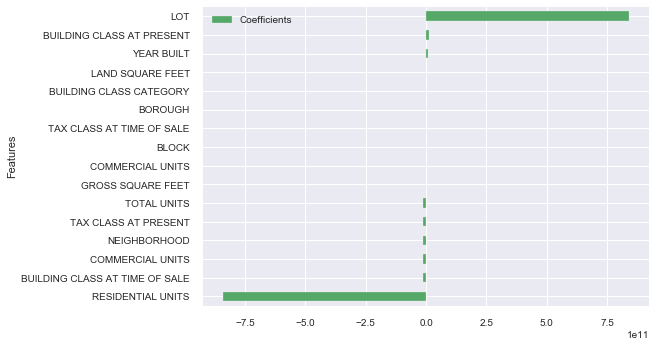

In [288]:
# Plot Contribution chart
coefficients_pd.sort_values('Coefficients').set_index('Features').plot(kind = 'barh', color = 'g')

### Model Error

In [289]:
np.sqrt(mse(y_predicted, y_test)) # Root mean squared error

107422.28607122207